In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
def converge_generation(path, simulation, file_tag, increments, type_1, type_2):

    mech1 = np.loadtxt(path + f'{simulation}/{file_tag}_{type_1}_dissociation_distances.txt')
    mech2 = np.loadtxt(path + f'{simulation}/{file_tag}_{type_2}_dissociation_distances.txt')

    result = []

    for i in increments:
        truncated_mech1 = mech1[:i]
        truncated_mech2 = mech2[:i]


        m2_in_m1 = len(np.intersect1d(truncated_mech1, truncated_mech2))
        result.append(m2_in_m1*100/len(truncated_mech1))

    return result

Text(0.5, 0.01, 'No. Trajectories')

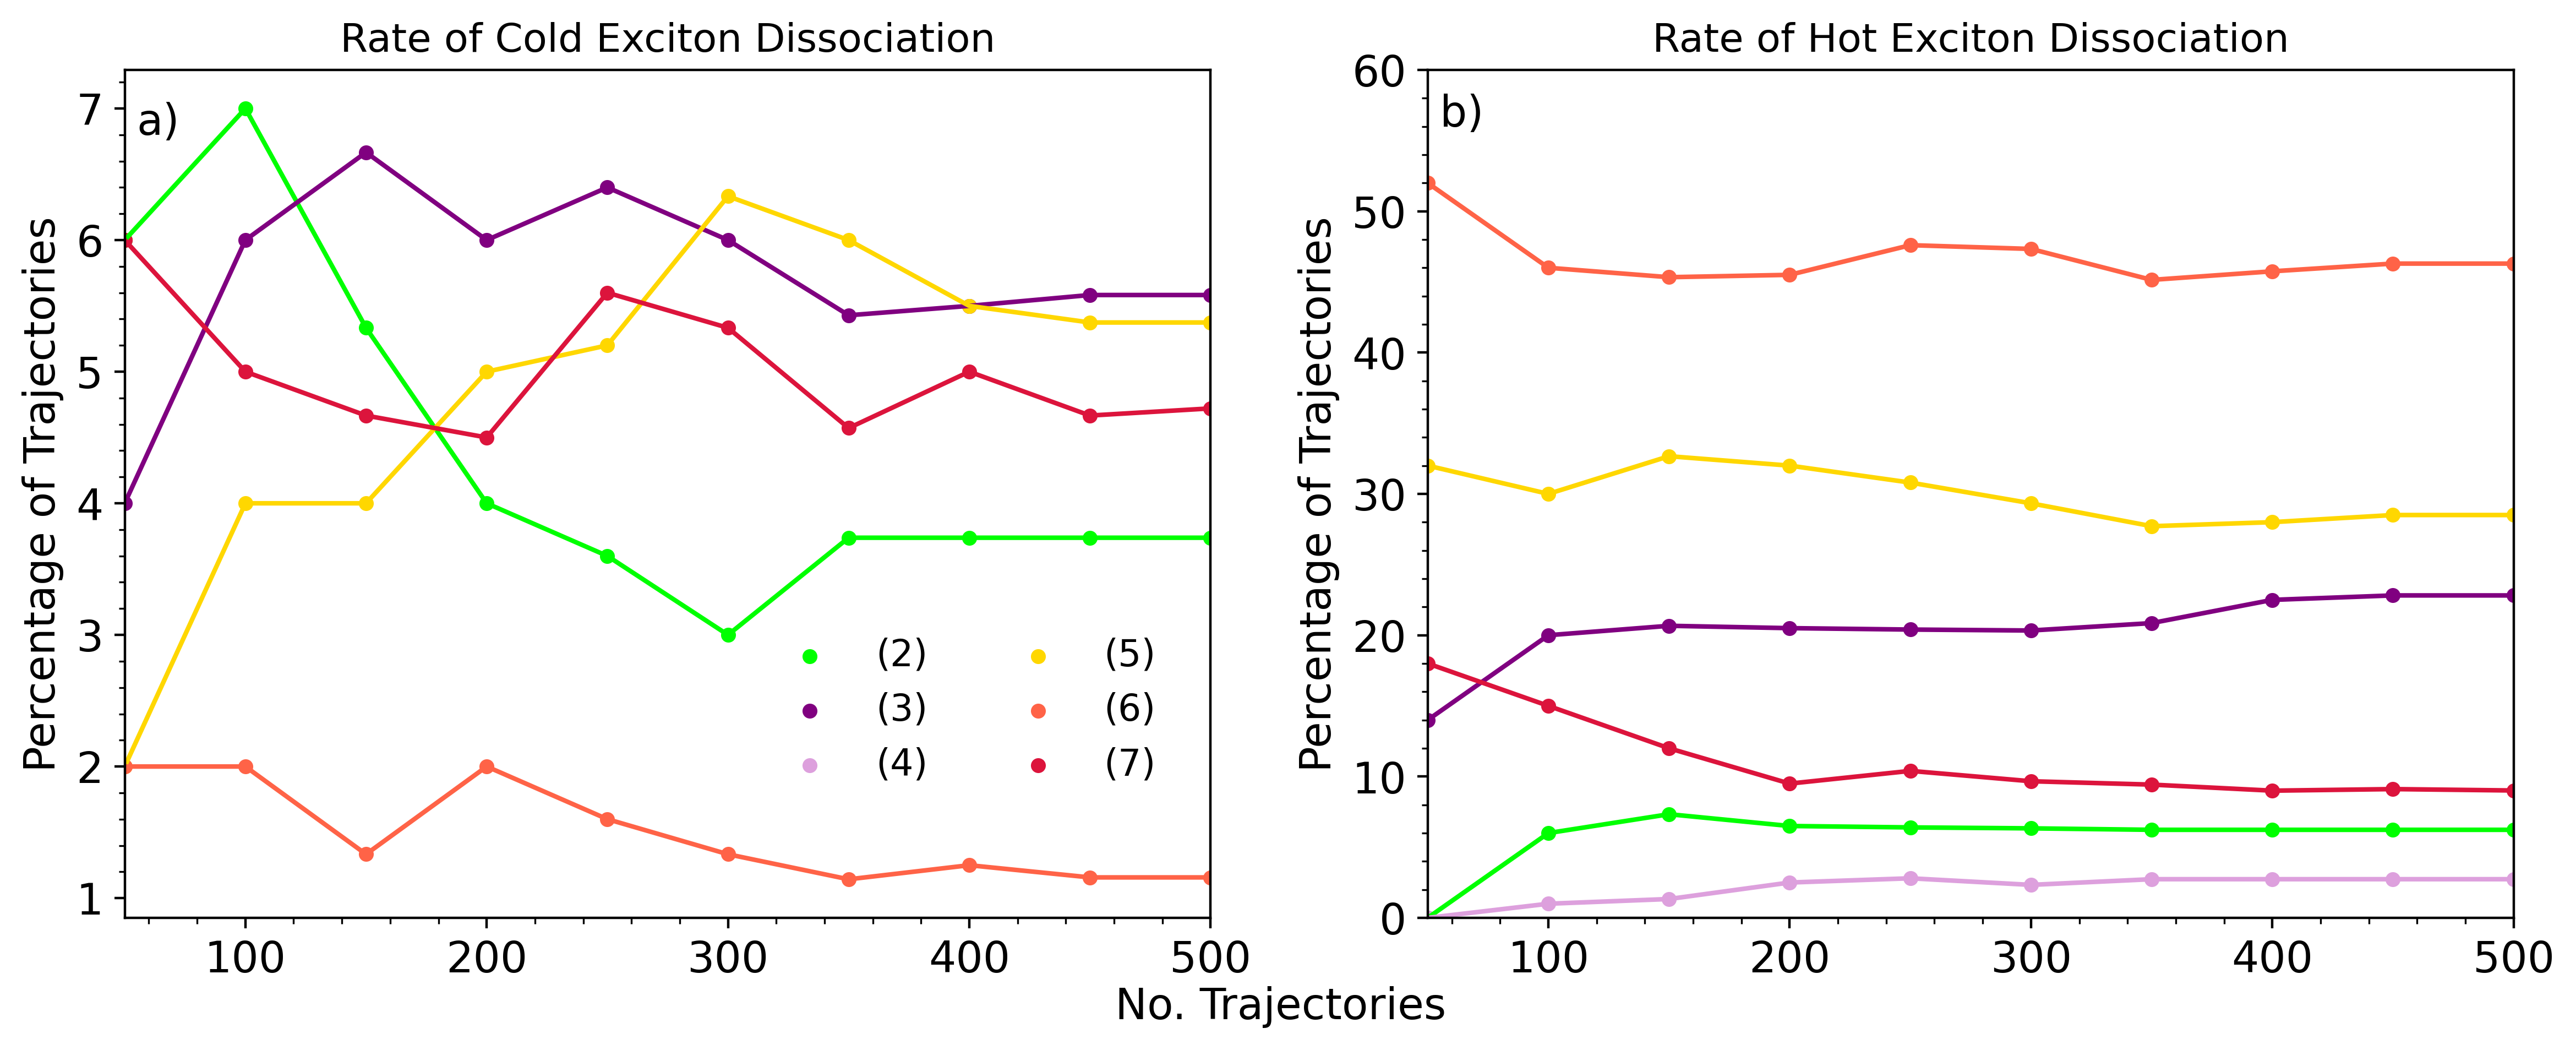

In [3]:
path = 'saved_wf_processing/dissociation_info/'
increments = np.arange(50,550,50)
file_tags = ['e3.5_2xCT', 'e3.5_3xCT', 'e5', 'e5_2xCT', 'e5_3xCT', 'e10']
simulations = ['epsilon3.5_2xCTcoup', 'epsilon3.5_3xCTcoup', 'epsilon5_offset0.4', 'epsilon5_2xCTcoup', 'epsilon5_3xCTcoup', 'epsilon10_offset0.4']
colour_list = ['lime', 'purple', 'plum', 'gold', 'tomato', 'crimson']
label_list = ['(2)', '(3)', '(4)', '(5)', '(6)', '(7)']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,5), rasterized=True, dpi=400)

for index in range(len(simulations)):

    try:

        hgen = converge_generation(path, simulations[index], file_tags[index], increments, 'all', 'hGen')
        axs[1].scatter(increments, hgen, color=colour_list[index], s=15, label=label_list[index])
        axs[1].plot(increments, hgen, color=colour_list[index])

        tgen = converge_generation(path, simulations[index], file_tags[index], increments, 'all', 'tGen')
        axs[0].scatter(increments, tgen, color=colour_list[index], s=15)
        axs[0].plot(increments, tgen, color=colour_list[index])

    except:
        continue

axs[0].yaxis.set_tick_params(labelsize = 14)
axs[0].xaxis.set_tick_params(labelsize = 14)
axs[0].minorticks_on()
axs[0].set_title('Rate of Cold Exciton Dissociation', fontsize=13)
axs[0].set_ylabel('Percentage of Trajectories', fontsize=14)
axs[0].text(55, 6.8, 'a)', fontsize=14)
axs[0].set_xlim([50,500])

axs[1].yaxis.set_tick_params(labelsize = 14)
axs[1].xaxis.set_tick_params(labelsize = 14)
axs[1].minorticks_on()
axs[1].set_title('Rate of Hot Exciton Dissociation', fontsize=13)
axs[1].set_ylabel('Percentage of Trajectories', fontsize=14)
axs[1].set_ylim([0,60])
axs[1].set_xlim([50,500])
axs[1].text(55, 56, 'b)', fontsize=14)
axs[1].legend(bbox_to_anchor=(-0.22, 0.37), fontsize=12, frameon=False, ncols=2)

fig.supxlabel('No. Trajectories', fontsize=14)

In [4]:
def accumulate_avg(data_array):

    number_elements = np.arange(1,len(data_array)+1)
    cumulative_sum = np.cumsum(data_array)

    return cumulative_sum/number_elements

In [5]:
def accumulate_se(data_array):

    acc_se = np.zeros(len(data_array)-1)

    for i in np.arange(1,len(data_array)):

        t_array = data_array[:i]
        sd = np.std(t_array)
        se = sd/np.sqrt(i)

        acc_se[i-1] = se

    return acc_se

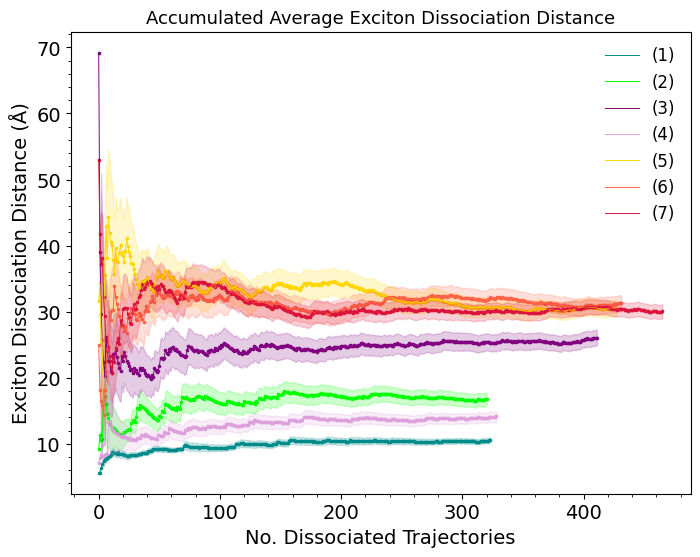

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6))

file_tags = ['physopt_retry', 'e3.5_2xCT', 'e3.5_3xCT', 'e5', 'e5_2xCT', 'e5_3xCT', 'e10']
simulations = ['physical_system_optical_retry', 'epsilon3.5_2xCTcoup', 'epsilon3.5_3xCTcoup', 'epsilon5_offset0.4', 'epsilon5_2xCTcoup', 'epsilon5_3xCTcoup', 'epsilon10_offset0.4']
colour_list = ['darkcyan', 'lime', 'purple', 'plum', 'gold', 'tomato', 'crimson']
label_list = ['(1)', '(2)', '(3)', '(4)', '(5)', '(6)', '(7)']

for index in range(len(simulations)):

    dissociation_distances = np.loadtxt(path + f'{simulations[index]}/{file_tags[index]}_all_dissociation_distances.txt')
    accumulated_avg_d = accumulate_avg(dissociation_distances - 92)
    accumulated_se_d = accumulate_se(dissociation_distances - 92)

    ax.scatter(np.arange(len(accumulated_avg_d)), accumulated_avg_d, color=colour_list[index], s=2.5)
    ax.plot(np.arange(len(accumulated_avg_d)), accumulated_avg_d, color=colour_list[index], linewidth=0.7, label=label_list[index])
    ax.fill_between(np.arange(1,len(accumulated_avg_d)), accumulated_avg_d[1:] - accumulated_se_d, accumulated_avg_d[1:] + accumulated_se_d, color=colour_list[index], alpha=0.2)

ax.yaxis.set_tick_params(labelsize = 14)
ax.xaxis.set_tick_params(labelsize = 14)
ax.minorticks_on()
ax.set_title('Accumulated Average Exciton Dissociation Distance', fontsize=13)
ax.set_ylabel('Exciton Dissociation Distance (\u212B)', fontsize=14)
ax.set_xlabel('No. Dissociated Trajectories', fontsize=14)
ax.legend(loc='upper right', fontsize=12, frameon=False)

In [7]:
def sparse_sample(data_array, skip_step):

    sparse_data_array = data_array[np.arange(0,len(data_array),skip_step)]
    return sparse_data_array

In [8]:
physopt_0p01_xt = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/average_populations/physopt_0.01fs_avg_XT.txt')
physopt_0p01_css = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/average_populations/physopt_0.01fs_avg_CSS.txt')
physopt_0p01_ct = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/average_populations/physopt_0.01fs_avg_CT.txt')
physopt_0p01_int = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/average_populations/physopt_0.01fs_avg_INT.txt')

physopt_1ps_xt = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/average_populations/physopt_retry_avg_XT.txt')[:2001]
physopt_1ps_css = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/average_populations/physopt_retry_avg_CSS.txt')[:2001]
physopt_1ps_int = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/average_populations/physopt_retry_avg_INT.txt')[:2001]
physopt_1ps_ct = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/average_populations/physopt_retry_avg_CT.txt')[:2001]

physopt_0p01_distances = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/dissociation_info/physical_system_optical_retry/physopt_0.01fs_all_dissociation_distances.txt') - 92
physopt_1ps_distances = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/dissociation_info/physical_system_optical_retry/physopt_retry_1ps_all_dissociation_distances.txt') - 92

physopt_0p01_eh = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/dissociation_info/physical_system_optical_retry/physopt_0.01fs_all_dissociation_eh_distances.txt')
physopt_1ps_eh = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/dissociation_info/physical_system_optical_retry/physopt_retry_1ps_all_dissociation_eh_distances.txt')

In [9]:
e5_0p01_xt = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/average_populations/e5_3xCT_0.01fs_avg_XT.txt')
e5_0p01_css = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/average_populations/e5_3xCT_0.01fs_avg_CSS.txt')
e5_0p01_ct = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/average_populations/e5_3xCT_0.01fs_avg_CT.txt')
e5_0p01_int = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/average_populations/e5_3xCT_0.01fs_avg_INT.txt')

e5_1ps_xt = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/average_populations/e5_3xCT_avg_XT.txt')[:2001]
e5_1ps_css = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/average_populations/e5_3xCT_avg_CSS.txt')[:2001]
e5_1ps_int = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/average_populations/e5_3xCT_avg_INT.txt')[:2001]
e5_1ps_ct = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/average_populations/e5_3xCT_avg_CT.txt')[:2001]

e5_0p01_distances = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/dissociation_info/epsilon5_3xCTcoup/e5_3xCT_0.01fs_all_dissociation_distances.txt') - 92
e5_1ps_distances = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/dissociation_info/epsilon5_3xCTcoup/e5_3xCT_1ps_all_dissociation_distances.txt') - 92

e5_0p01_eh = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/dissociation_info/epsilon5_3xCTcoup/e5_3xCT_0.01fs_all_dissociation_eh_distances.txt')
e5_1ps_eh = np.loadtxt('/scratch/fivanovic/X-SH/T6-PDI/production_runs/saved_wf_processing/dissociation_info/epsilon5_3xCTcoup/e5_3xCT_1ps_all_dissociation_eh_distances.txt')

In [10]:
sparse_physopt_p01_xt = sparse_sample(physopt_0p01_xt, 50)
sparse_physopt_p01_css = sparse_sample(physopt_0p01_css, 50)
sparse_physopt_p01_ct = sparse_sample(physopt_0p01_ct, 50)
sparse_physopt_p01_int = sparse_sample(physopt_0p01_int, 50)

sparse_e5_p01_xt = sparse_sample(e5_0p01_xt, 50)
sparse_e5_p01_css = sparse_sample(e5_0p01_css, 50)
sparse_e5_p01_ct = sparse_sample(e5_0p01_ct, 50)
sparse_e5_p01_int = sparse_sample(e5_0p01_int, 50)

In [11]:
time = np.arange(len(physopt_1ps_ct))*10*0.05/1000

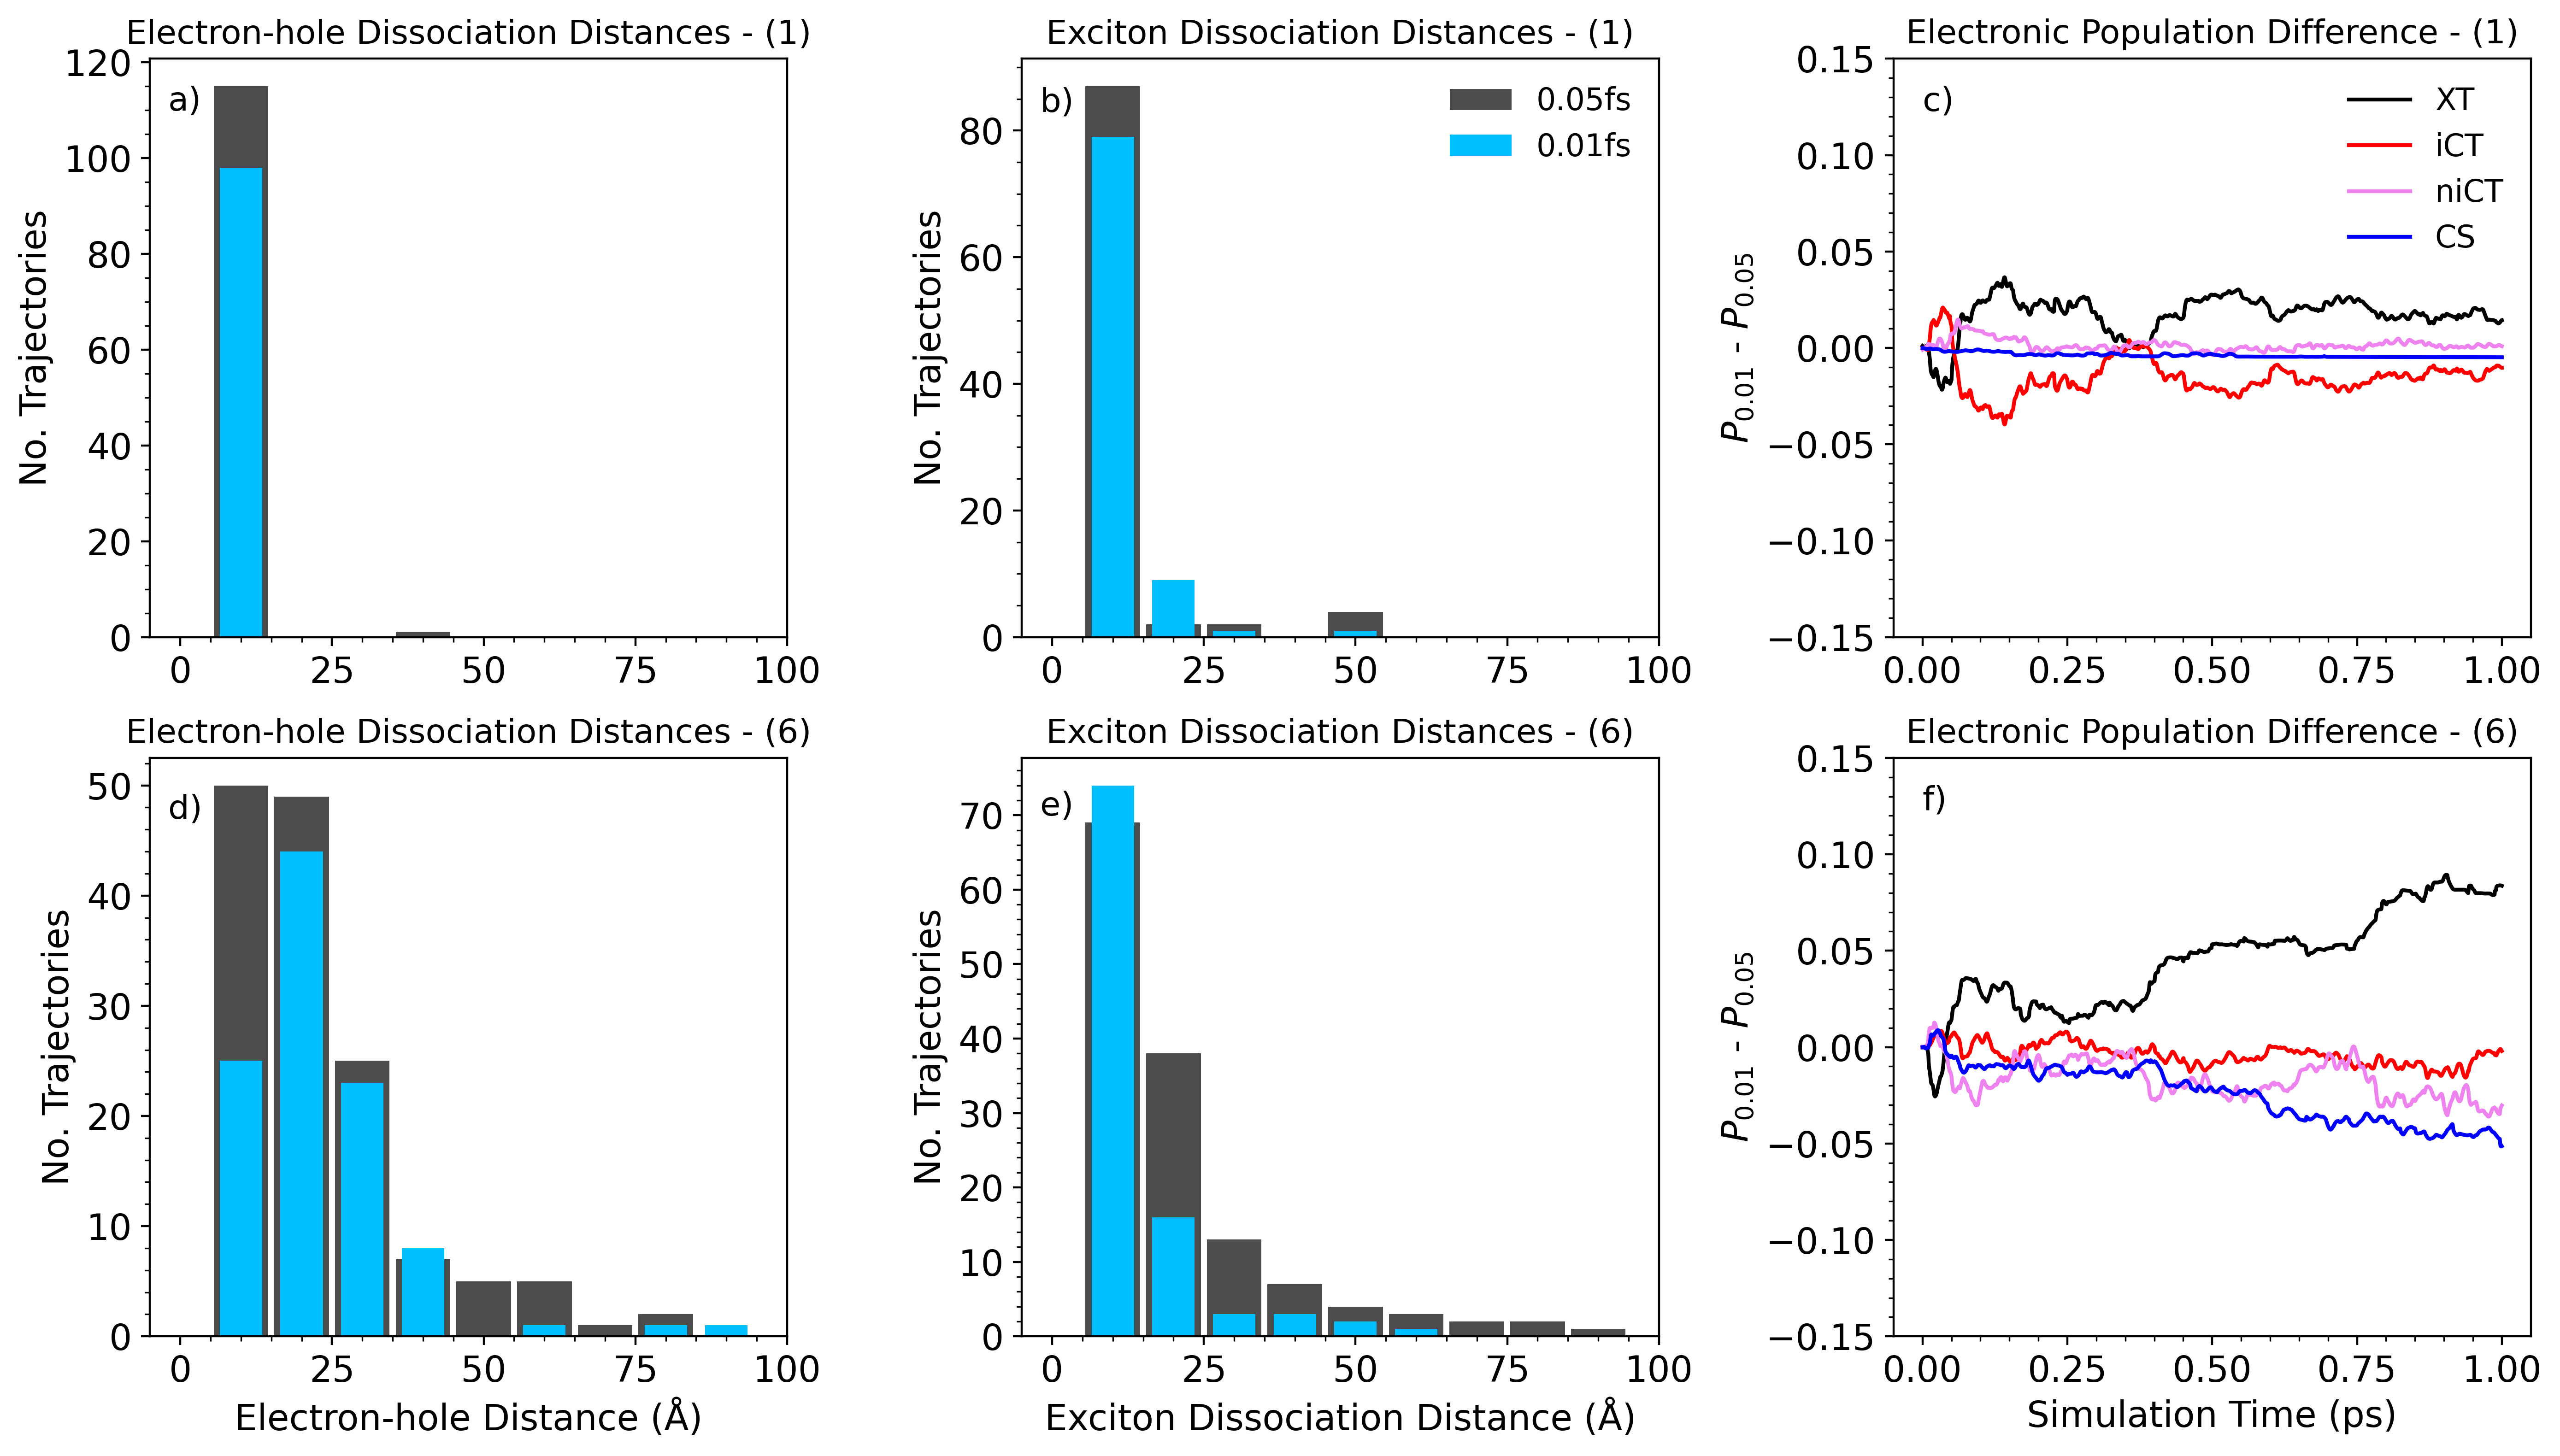

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14,8), rasterized=True, dpi=400)

distance_bins = np.arange(5,100,10)

axs[0,0].hist(physopt_1ps_eh, bins = distance_bins, color='k', rwidth=0.9, alpha=0.7)
axs[0,0].hist(physopt_0p01_eh, bins = distance_bins, color='deepskyblue', rwidth=0.7)
axs[0,0].yaxis.set_tick_params(labelsize = 14)
axs[0,0].xaxis.set_tick_params(labelsize = 14)
axs[0,0].minorticks_on()
axs[0,0].set_ylabel('No. Trajectories', fontsize=14)
axs[0,0].set_title('Electron-hole Dissociation Distances - (1)', fontsize=13)
axs[0,0].set_xlim([-5,100])
axs[0,0].text(-2, 110, 'a)', fontsize=13)

axs[0,1].hist(physopt_1ps_distances, bins = distance_bins, color='k', rwidth=0.9, alpha=0.7, label='0.05fs')
axs[0,1].hist(physopt_0p01_distances, bins = distance_bins, color='deepskyblue', rwidth=0.7, label='0.01fs')
axs[0,1].yaxis.set_tick_params(labelsize = 14)
axs[0,1].xaxis.set_tick_params(labelsize = 14)
axs[0,1].set_ylabel('No. Trajectories', fontsize=14)
axs[0,1].minorticks_on()
axs[0,1].set_title('Exciton Dissociation Distances - (1)', fontsize=13)
axs[0,1].legend(loc='upper right', frameon=False, fontsize=12)
axs[0,1].set_xlim([-5,100])
axs[0,1].text(-2, 83, 'b)', fontsize=13)

axs[0,2].plot(time, sparse_physopt_p01_xt - physopt_1ps_xt, color='k', label='XT')
#axs[0,2].plot(time, sparse_physopt_p01_xt, color='k', linestyle='dotted', label='0.01fs')
axs[0,2].plot(time, sparse_physopt_p01_int - physopt_1ps_int, color='r', label='iCT')
#axs[0,2].plot(time, sparse_physopt_p01_int, color='r', linestyle='dotted')
axs[0,2].plot(time, sparse_physopt_p01_ct - physopt_1ps_ct, color='violet', label='niCT')
#axs[0,2].plot(time, sparse_physopt_p01_ct, color='violet', linestyle='dotted')
axs[0,2].plot(time, sparse_physopt_p01_css - physopt_1ps_css, color='b', label='CS')
#axs[0,2].plot(time, sparse_physopt_p01_css, color='b', linestyle='dotted')
axs[0,2].yaxis.set_tick_params(labelsize = 14)
axs[0,2].xaxis.set_tick_params(labelsize = 14)
axs[0,2].minorticks_on()
axs[0,2].set_title('Electronic Population Difference - (1)', fontsize=13)
axs[0,2].set_ylabel('$P_{0.01}$ - $P_{0.05}$', fontsize=14)
axs[0,2].legend(loc='upper right', fontsize=12, frameon=False)
axs[0,2].set_ylim([-0.15,0.15])
axs[0,2].text(0.0, 0.123, 'c)', fontsize=13)

axs[1,0].hist(e5_1ps_eh, bins = distance_bins, color='k', rwidth=0.9, alpha=0.7)
axs[1,0].hist(e5_0p01_eh, bins = distance_bins, color='deepskyblue', rwidth=0.7)
axs[1,0].yaxis.set_tick_params(labelsize = 14)
axs[1,0].xaxis.set_tick_params(labelsize = 14)
axs[1,0].minorticks_on()
axs[1,0].set_xlabel('Electron-hole Distance (\u212B)', fontsize=14)
axs[1,0].set_ylabel('No. Trajectories', fontsize=14)
axs[1,0].set_title('Electron-hole Dissociation Distances - (6)', fontsize=13)
axs[1,0].set_xlim([-5,100])
axs[1,0].text(-2, 47, 'd)', fontsize=13)

axs[1,1].hist(e5_1ps_distances, bins = distance_bins, color='k', rwidth=0.9, alpha=0.7)
axs[1,1].hist(e5_0p01_distances, bins = distance_bins, color='deepskyblue', rwidth=0.7)
axs[1,1].yaxis.set_tick_params(labelsize = 14)
axs[1,1].xaxis.set_tick_params(labelsize = 14)
axs[1,1].set_ylabel('No. Trajectories', fontsize=14)
axs[1,1].minorticks_on()
axs[1,1].set_xlabel('Exciton Dissociation Distance (\u212B)', fontsize=14)
axs[1,1].set_title('Exciton Dissociation Distances - (6)', fontsize=13)
axs[1,1].set_xlim([-5,100])
axs[1,1].text(-2, 70, 'e)', fontsize=13)

axs[1,2].plot(time, sparse_e5_p01_xt - e5_1ps_xt, color='k')
#axs[1,2].plot(time, sparse_e5_p01_xt, color='k', linestyle='dotted')
axs[1,2].plot(time, sparse_e5_p01_int - e5_1ps_int, color='r')
#axs[1,2].plot(time, sparse_e5_p01_int, color='r', linestyle='dotted')
axs[1,2].plot(time, sparse_e5_p01_ct - e5_1ps_ct, color='violet')
#axs[1,2].plot(time, sparse_e5_p01_ct, color='violet', linestyle='dotted')
axs[1,2].plot(time, sparse_e5_p01_css - e5_1ps_css, color='b')
#axs[1,2].plot(time, sparse_e5_p01_css, color='b', linestyle='dotted')
axs[1,2].yaxis.set_tick_params(labelsize = 14)
axs[1,2].xaxis.set_tick_params(labelsize = 14)
axs[1,2].minorticks_on()
axs[1,2].set_ylabel('$P_{0.01}$ - $P_{0.05}$', fontsize=14)
axs[1,2].set_xlabel('Simulation Time (ps)', fontsize=14)
axs[1,2].set_title('Electronic Population Difference - (6)', fontsize=13)
axs[1,2].set_ylim([-0.15,0.15])
axs[1,2].text(0.0, 0.123, 'f)', fontsize=13)

fig.tight_layout()